In [61]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [17]:
file_path = 'https://github.com/Danielaaron1994/G-N/raw/main/genderdata.csv'

In [18]:
df = pd.read_csv(file_path, error_bad_lines=False)

In [19]:
# Fixing some minor typed response errors in the dataframe

df = df.drop(columns=['Unnamed: 0'])
df = df.replace('2.0','Female')
df = df.replace('1', '1.0')
df = df.replace('1.0','Male')

array([<AxesSubplot:title={'center':'NO NOISE WORDS'}, xlabel='WM'>,
       <AxesSubplot:title={'center':'NOISY WORDS'}, xlabel='WM'>],
      dtype=object)

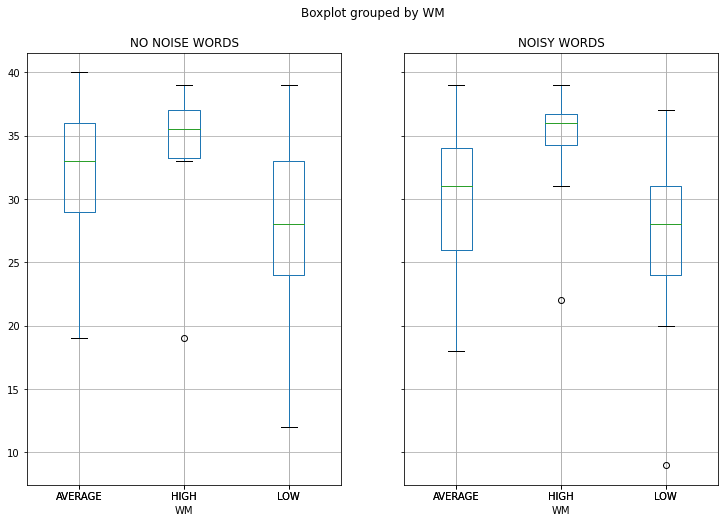

In [20]:
# This is the performance of participants in noisy and quite conditions as a function of their working memory (WM)
# The score can range from 0 to 40, and as you see the performance of participants with higher working memory capacity is 
#significantly different from lower groups

df.boxplot(column =['NO NOISE WORDS','NOISY WORDS'], by='WM', figsize=(12, 8))

array([<AxesSubplot:title={'center':'NO NOISE WORDS'}, xlabel='SHM'>,
       <AxesSubplot:title={'center':'NOISY WORDS'}, xlabel='SHM'>],
      dtype=object)

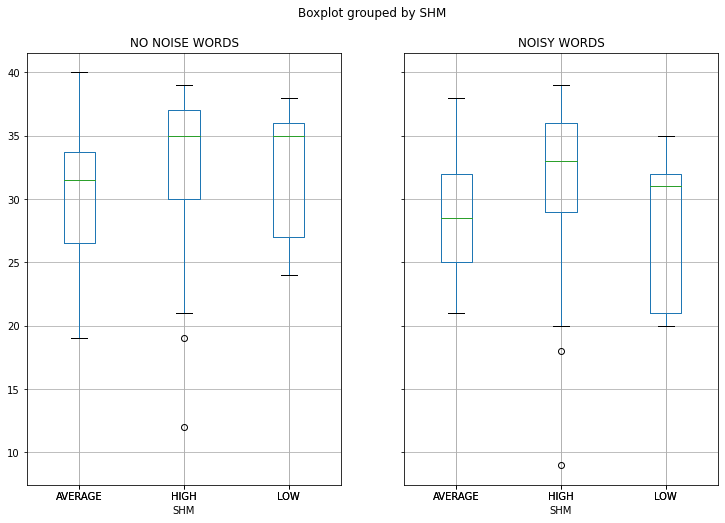

In [21]:
# Short term memory (SHM) did not show the same effectiveness in predicting the performance of participants 
# and hence will be removed from the task in next pilot studies to make the test shorter

df.boxplot(column =['NO NOISE WORDS','NOISY WORDS'], by='SHM', figsize=(12, 8))

In [22]:
# To increase the accuracy of data we remove the lowest working memory group which suggest they were less attentive during the task

options = ['AVERAGE', 'HIGH'] 
df = df[df['WM'].isin(options)]


array([<AxesSubplot:title={'center':'NO NOISE WORDS'}, xlabel='WM'>,
       <AxesSubplot:title={'center':'NOISY WORDS'}, xlabel='WM'>],
      dtype=object)

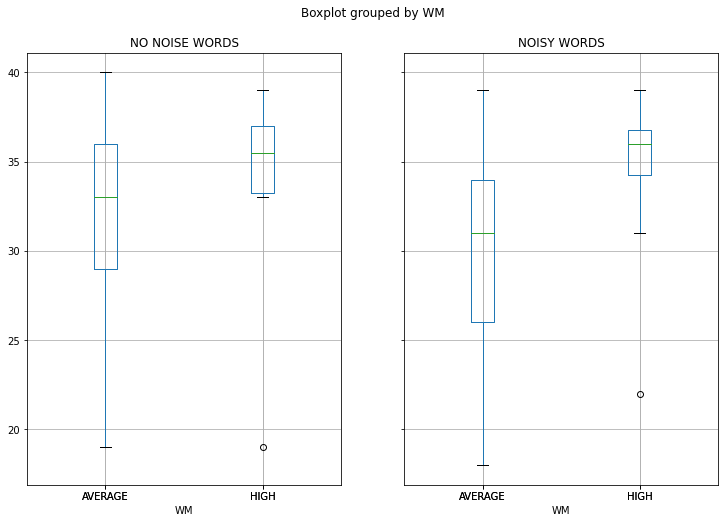

In [23]:
# The result looks like this
# This is in accordance with previous studies

df.boxplot(column =['NO NOISE WORDS','NOISY WORDS'], by='WM', figsize=(12, 8))

In [24]:
# There is no significant difference between performance of participants in noisy and quite conditions in this recognition task

ttest_ind(df['NOISY WORDS'], df['NO NOISE WORDS'])

Ttest_indResult(statistic=-1.2489787313706198, pvalue=0.2155062127438105)

array([<AxesSubplot:title={'center':'NO NOISE WORDS'}, xlabel='GENDER'>,
       <AxesSubplot:title={'center':'NOISY WORDS'}, xlabel='GENDER'>],
      dtype=object)

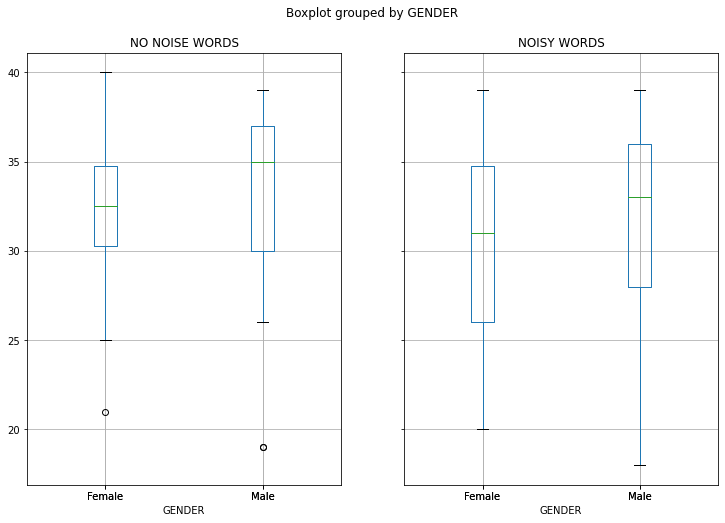

In [25]:
# Here we see the performance of two genders in the noisy and withoit noise condition regardless of the speaker's gender

df.boxplot(column =['NO NOISE WORDS','NOISY WORDS'], by='GENDER', figsize=(12, 8))

array([<AxesSubplot:title={'center':'MALE WORDS'}, xlabel='GENDER'>,
       <AxesSubplot:title={'center':'FEMALE WORDS'}, xlabel='GENDER'>],
      dtype=object)

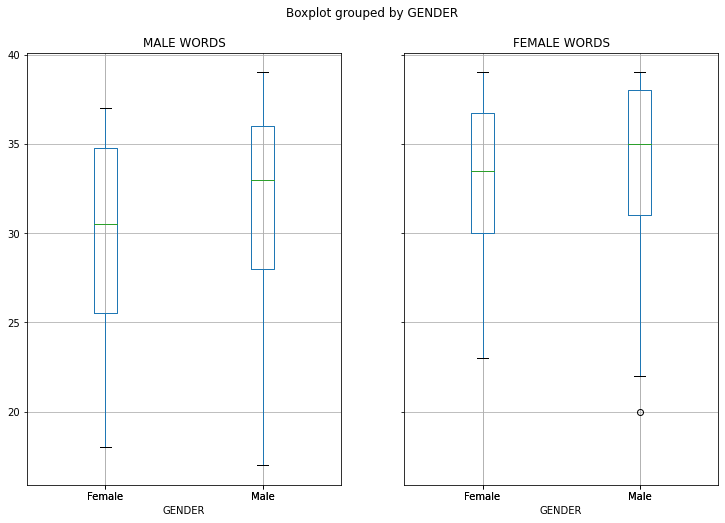

In [26]:
# Here we see the performance of male and female participants when the speaker voice was male and female
#Although the difference is not statistically significant but we see a slightly better performance in both genders when the voice is female

df.boxplot(column =['MALE WORDS','FEMALE WORDS'], by='GENDER', figsize=(12, 8))

array([<AxesSubplot:title={'center':'MALE NOISY WORDS'}, xlabel='GENDER'>,
       <AxesSubplot:title={'center':'FEMALE NOISY WORDS'}, xlabel='GENDER'>],
      dtype=object)

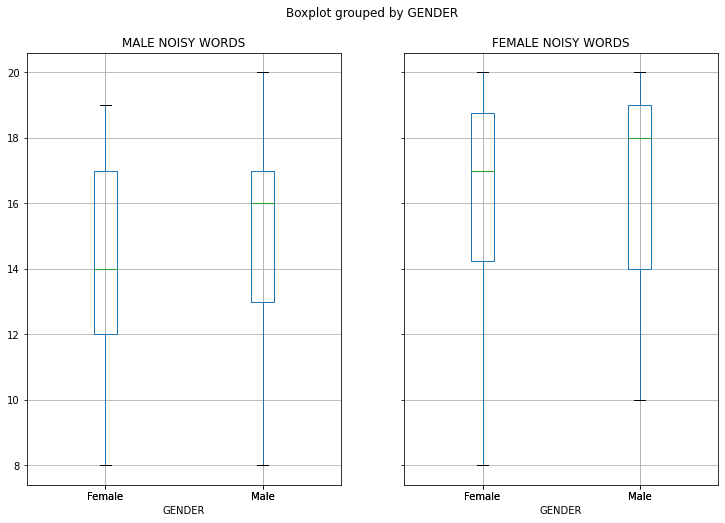

In [27]:
# This is the difference between two genders in noisy condition when the speaker was male and female

df.boxplot(column =['MALE NOISY WORDS','FEMALE NOISY WORDS'], by='GENDER', figsize=(12, 8))

In [28]:
# There is no significant difference between male and female participants when the voice was female

ttest_ind(df['FEMALE WORDS'].where(df['GENDER'] == "Female").dropna(), 
          df['FEMALE WORDS'].where(df['GENDER'] == "Male").dropna())

Ttest_indResult(statistic=-0.34112433251384944, pvalue=0.7349396072761838)

In [29]:
# There is no significant difference between male and female participants when the voice was male

ttest_ind(df['MALE WORDS'].where(df['GENDER'] == "Female").dropna(), 
          df['MALE WORDS'].where(df['GENDER'] == "Male").dropna())

Ttest_indResult(statistic=-0.9134197086661094, pvalue=0.3669358288890111)

In [34]:
# There is no significant difference between female participants when the voice was male or female

ttest_ind(df['FEMALE WORDS'].where(df['GENDER'] == "Female").dropna(),
          df['MALE WORDS'].where(df['GENDER'] == "Female").dropna())

Ttest_indResult(statistic=1.4158666850608317, pvalue=0.16868319752078845)

In [31]:
# There is no significant difference between male participants when the voice was male or female

ttest_ind(df['MALE WORDS'].where(df['GENDER'] == "Male").dropna(), 
          df['FEMALE WORDS'].where(df['GENDER'] == "Male").dropna())

Ttest_indResult(statistic=-1.06645124372866, pvalue=0.29155453397451947)

In [32]:
# There is no significant difference between male and female participants when the voice was noisy and male

ttest_ind(df['MALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna(),
          df['MALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna())

Ttest_indResult(statistic=1.1507467507672775, pvalue=0.2572192796400142)

In [35]:
# There is no significant difference between male and female participants when the voice was noisy and female

ttest_ind(df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna(), 
          df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna())

Ttest_indResult(statistic=0.015369923519119113, pvalue=0.9878196395162581)

In [36]:
# There is no significant difference between female participants when the voice was noisy and male or noisy and female

ttest_ind(df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna(),
          df['MALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna())

Ttest_indResult(statistic=1.5644956036230988, pvalue=0.12979251398306454)

In [37]:
# There is no significant difference between male participants when the voice was noisy and male or noisy and female

ttest_ind(df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna(),
          df['MALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna())

Ttest_indResult(statistic=0.887866421666539, pvalue=0.3790401499233975)

In [38]:
# There is no significant difference between male participants when the voice was noisy and female or without noise and female

ttest_ind(df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna(),
          df['FEMALE NO NOISE WORDS'].where(df['GENDER'] == "Male").dropna())

Ttest_indResult(statistic=-1.0319430656044268, pvalue=0.30727048278692237)

In [39]:
# There is no significant difference between female participants when the voice was noisy and female or without noise and female

ttest_ind(df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna(),
          df['FEMALE NO NOISE WORDS'].where(df['GENDER'] == "Female").dropna())

Ttest_indResult(statistic=-0.2535288643197512, pvalue=0.8018536300085317)

In [40]:
# There is no significant difference between female participants when the voice was noisy and male or without noise and male

ttest_ind(df['MALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna(),
          df['MALE NO NOISE WORDS'].where(df['GENDER'] == "Female").dropna())

Ttest_indResult(statistic=-1.1371867556727384, pvalue=0.2658323874148979)

In [60]:
                                               # ******************** #
    
#There is a significant difference between female participants when the voice was noisy and male or without noise and female

ttest_ind(df['MALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna(),
          df['FEMALE NO NOISE WORDS'].where(df['GENDER'] == "Female").dropna())

Ttest_indResult(statistic=-2.0735818291225407, pvalue=0.04816234994904224)

{'whiskers': [<matplotlib.lines.Line2D at 0x13bc5afc190>,
 'caps': [<matplotlib.lines.Line2D at 0x13bc5afc850>,
 'boxes': [<matplotlib.lines.Line2D at 0x13bc5aecdf0>,
 'medians': [<matplotlib.lines.Line2D at 0x13bc5afcf10>,
 'fliers': [<matplotlib.lines.Line2D at 0x13bc5b07610>,
 'means': [<matplotlib.lines.Line2D at 0x13bc5b072b0>,
  <matplotlib.lines.Line2D at 0x13bc5b14df0>]}

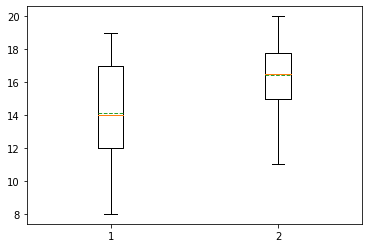

In [51]:
# The plot of above mentioned relationship

plt.boxplot([df['MALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna()
             ,df['FEMALE NO NOISE WORDS'].where(df['GENDER'] == "Female").dropna()], meanline=True, showmeans= True)

In [42]:
                                           #**********************#
    
#There is a significant difference between male participants when the voice was noisy and male or without noise and female

ttest_ind(df['MALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna(),
          df['FEMALE NO NOISE WORDS'].where(df['GENDER'] == "Male").dropna())

Ttest_indResult(statistic=-2.045538103200859, pvalue=0.046303318482852705)

{'whiskers': [<matplotlib.lines.Line2D at 0x13bc5b74520>,
 'caps': [<matplotlib.lines.Line2D at 0x13bc5b74be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13bc5b741c0>,
 'medians': [<matplotlib.lines.Line2D at 0x13bc5b802e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x13bc5b809a0>,
 'means': [<matplotlib.lines.Line2D at 0x13bc5b80640>,
  <matplotlib.lines.Line2D at 0x13bc5b981c0>]}

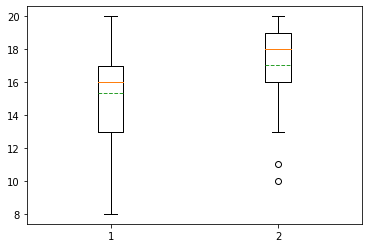

In [52]:
# The plot of above mentioned relationship

plt.boxplot([df['MALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna()
             ,df['FEMALE NO NOISE WORDS'].where(df['GENDER'] == "Male").dropna()], meanline=True, showmeans= True)

In [43]:
# There is no significant difference between male participants when the voice was noisy and female or without noise and male


ttest_ind(df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Male").dropna(),
          df['MALE NO NOISE WORDS'].where(df['GENDER'] == "Male").dropna())

Ttest_indResult(statistic=0.08599996416669105, pvalue=0.9318241828107414)

In [44]:
# There is no significant difference between female participants when the voice was noisy and female or without noise and male

ttest_ind(df['FEMALE NOISY WORDS'].where(df['GENDER'] == "Female").dropna(),
          df['MALE NO NOISE WORDS'].where(df['GENDER'] == "Female").dropna())

Ttest_indResult(statistic=0.528568304109613, pvalue=0.6015882870206029)

array([<AxesSubplot:title={'center':'RT_Male'}, xlabel='GENDER'>,
       <AxesSubplot:title={'center':'RT_Female'}, xlabel='GENDER'>],
      dtype=object)

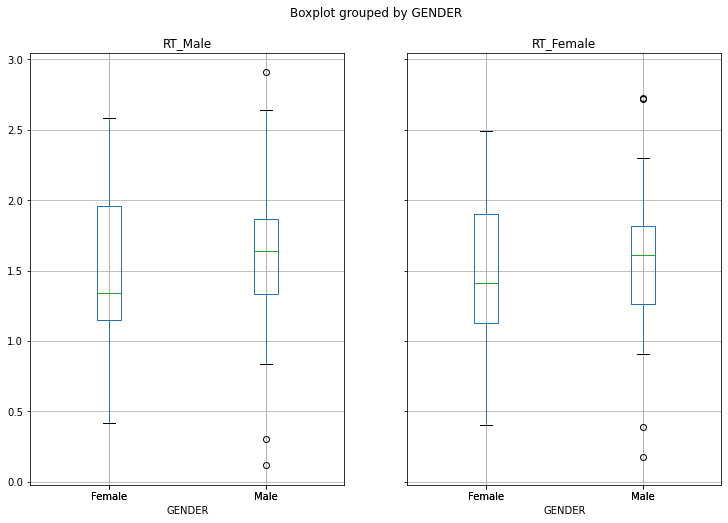

In [55]:
# Below is the plot of reaction time of male and female participants when the voise was male and female

df.boxplot(column = ['RT_Male','RT_Female'], by='GENDER', figsize=(12, 8))